In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [212]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_14_Decision_tree

14-07-2022  21:58    <DIR>          .
14-07-2022  21:58    <DIR>          ..
14-07-2022  21:52    <DIR>          .ipynb_checkpoints
14-07-2022  21:58               852 assignment14_decision_tree.ipynb
14-07-2022  08:43            17,023 Company_Data.csv
14-07-2022  08:43            21,837 Fraud_check.csv
14-07-2022  08:43             1,377 problem statement(company data).txt
14-07-2022  08:43               460 Problem_statement(Fraudcheck).txt
               5 File(s)         41,549 bytes
               3 Dir(s)  119,324,868,608 bytes free


# Q1. Detecting Fraud

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not (YES and NO)

Marital.Status : marital status of a person (Single, Married, Divorced)

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government (Numerical)

Work Experience : Work experience of an individual person (Numerical--> years)

Urban : Whether that person belongs to urban area or not (Yes and NO)

City Population : Count of people living in the city

In [71]:
data_1=pd.read_csv("Fraud_check.csv")

In [72]:
data_1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [73]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [74]:
data_1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

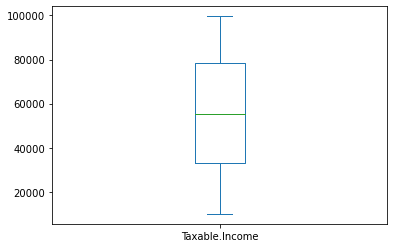

In [75]:
# Outliers Check
data_1['Taxable.Income'].plot(kind='box')

The data has no outliers

In [76]:
# Encoding the categorical data
label_encoder=preprocessing.LabelEncoder()
data_1['grad']=label_encoder.fit_transform(data_1['Undergrad'])
data_1.drop(columns='Undergrad',inplace=True)

In [77]:
data_1['marital_sts']=label_encoder.fit_transform(data_1['Marital.Status'])
data_1.drop(columns='Marital.Status',inplace=True)

In [78]:
data_1['urban']=label_encoder.fit_transform(data_1['Urban'])
data_1.drop(columns='Urban',inplace=True)

In [79]:
data_1

,Taxable.Income,City.Population,Work.Experience,grad,marital_sts,urban
0,68833,50047,10,0,2,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,2,1
4,81002,27533,28,0,1,0
...,...,...,...,...,...,...
595,76340,39492,7,1,0,1
596,69967,55369,2,1,0,1
597,47334,154058,0,0,0,1
598,98592,180083,17,1,1,0


In [80]:
# Function for changing the position of the column
def reorder_column(data,col_name,position):
    temp_col=data[col_name]
    data=data.drop(columns=[col_name])
    data.insert(loc=position, column=col_name, value=temp_col)
    return data

In [81]:
# Changing the position of Target variable 
df=reorder_column(data=data_1,col_name='Taxable.Income',position=5)
df

,City.Population,Work.Experience,grad,marital_sts,urban,Taxable.Income
0,50047,10,0,2,1,68833
1,134075,18,1,0,1,33700
2,160205,30,0,1,1,36925
3,193264,15,1,2,1,50190
4,27533,28,0,1,0,81002
...,...,...,...,...,...,...
595,39492,7,1,0,1,76340
596,55369,2,1,0,1,69967
597,154058,0,0,0,1,47334
598,180083,17,1,1,0,98592


In this data the Target variable--> Taxable income is a continuos data, we have to convert it into categorical based on the given condition.

If Taxable Income<= 30000 label it as "Risky", otherwise label it as "Good"

In [82]:
df['Taxable.Income']=np.where(df['Taxable.Income']<=30000,'Risky','Good')

In [83]:
df.sample(20)  

,City.Population,Work.Experience,grad,marital_sts,urban,Taxable.Income
289,196816,14,0,2,0,Good
361,62671,20,1,0,0,Good
43,50020,10,1,0,0,Good
404,34334,21,1,0,1,Good
114,197934,7,0,2,0,Risky
423,80249,19,0,1,1,Good
388,151636,4,1,0,1,Good
306,185099,12,1,0,0,Good
166,73466,22,0,1,1,Good
565,31064,28,0,0,0,Good


In [84]:
# Let the label "Risky"==1 and "Good"==0
# df['Taxable.Income']=np.where(df['Taxable.Income']=='Risky',1,0)
# df.sample(20)

In [85]:
# Checking the correlation
corr=df.corr()
corr

,City.Population,Work.Experience,grad,marital_sts,urban
City.Population,1.000000,0.013135,0.079579,-0.001564,-0.040098
Work.Experience,0.013135,1.000000,-0.005362,-0.002213,-0.094559
grad,0.079579,-0.005362,1.000000,0.042407,-0.000267
marital_sts,-0.001564,-0.002213,0.042407,1.000000,0.064562
urban,-0.040098,-0.094559,-0.000267,0.064562,1.000000


<AxesSubplot:>

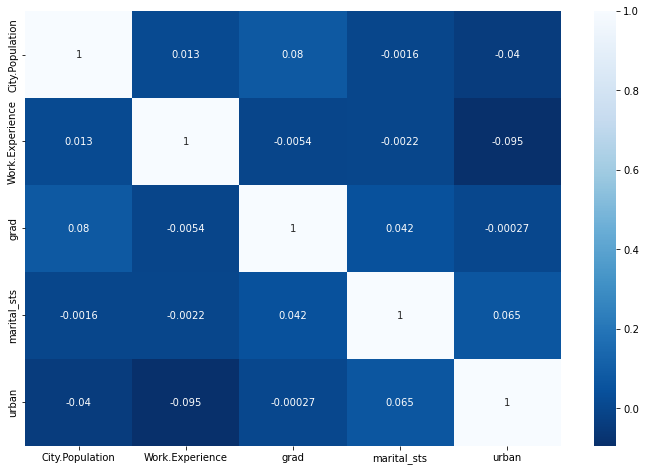

In [111]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='Blues_r')

The features are having very low correlation

In [112]:
# Splitting the features and target variable
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [113]:
# Splitting the data into Training and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [128]:
# Creating the model
DT=DecisionTreeClassifier(criterion='entropy',min_samples_split=5,random_state=1)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=1)

In [129]:
# Testing the model on training data
y_train_pred=DT.predict(x_train)

In [130]:
accuracy_score(y_train,y_train_pred)

0.95

The accuracy is high for the training data because Decision Tree has the problem of Overfitting of the data and hence it tends to remember the entire training data.

In [131]:
confusion_matrix(y_train,y_train_pred)

array([[325,   5],
       [ 16,  74]], dtype=int64)

In [132]:
# Testing the model on testing data
y_test_pred=DT.predict(x_test)

In [133]:
accuracy_score(y_test,y_test_pred)

0.6944444444444444

In [134]:
confusion_matrix(y_test,y_test_pred)

array([[119,  27],
       [ 28,   6]], dtype=int64)

In [135]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
result

,Actual,Predicted
195,Good,Good
155,Good,Good
40,Good,Good
212,Good,Good
52,Good,Risky
...,...,...
568,Good,Good
358,Good,Good
456,Good,Good
577,Good,Good


# The accuracy on the test data is 69.4% 

# Tree Plot

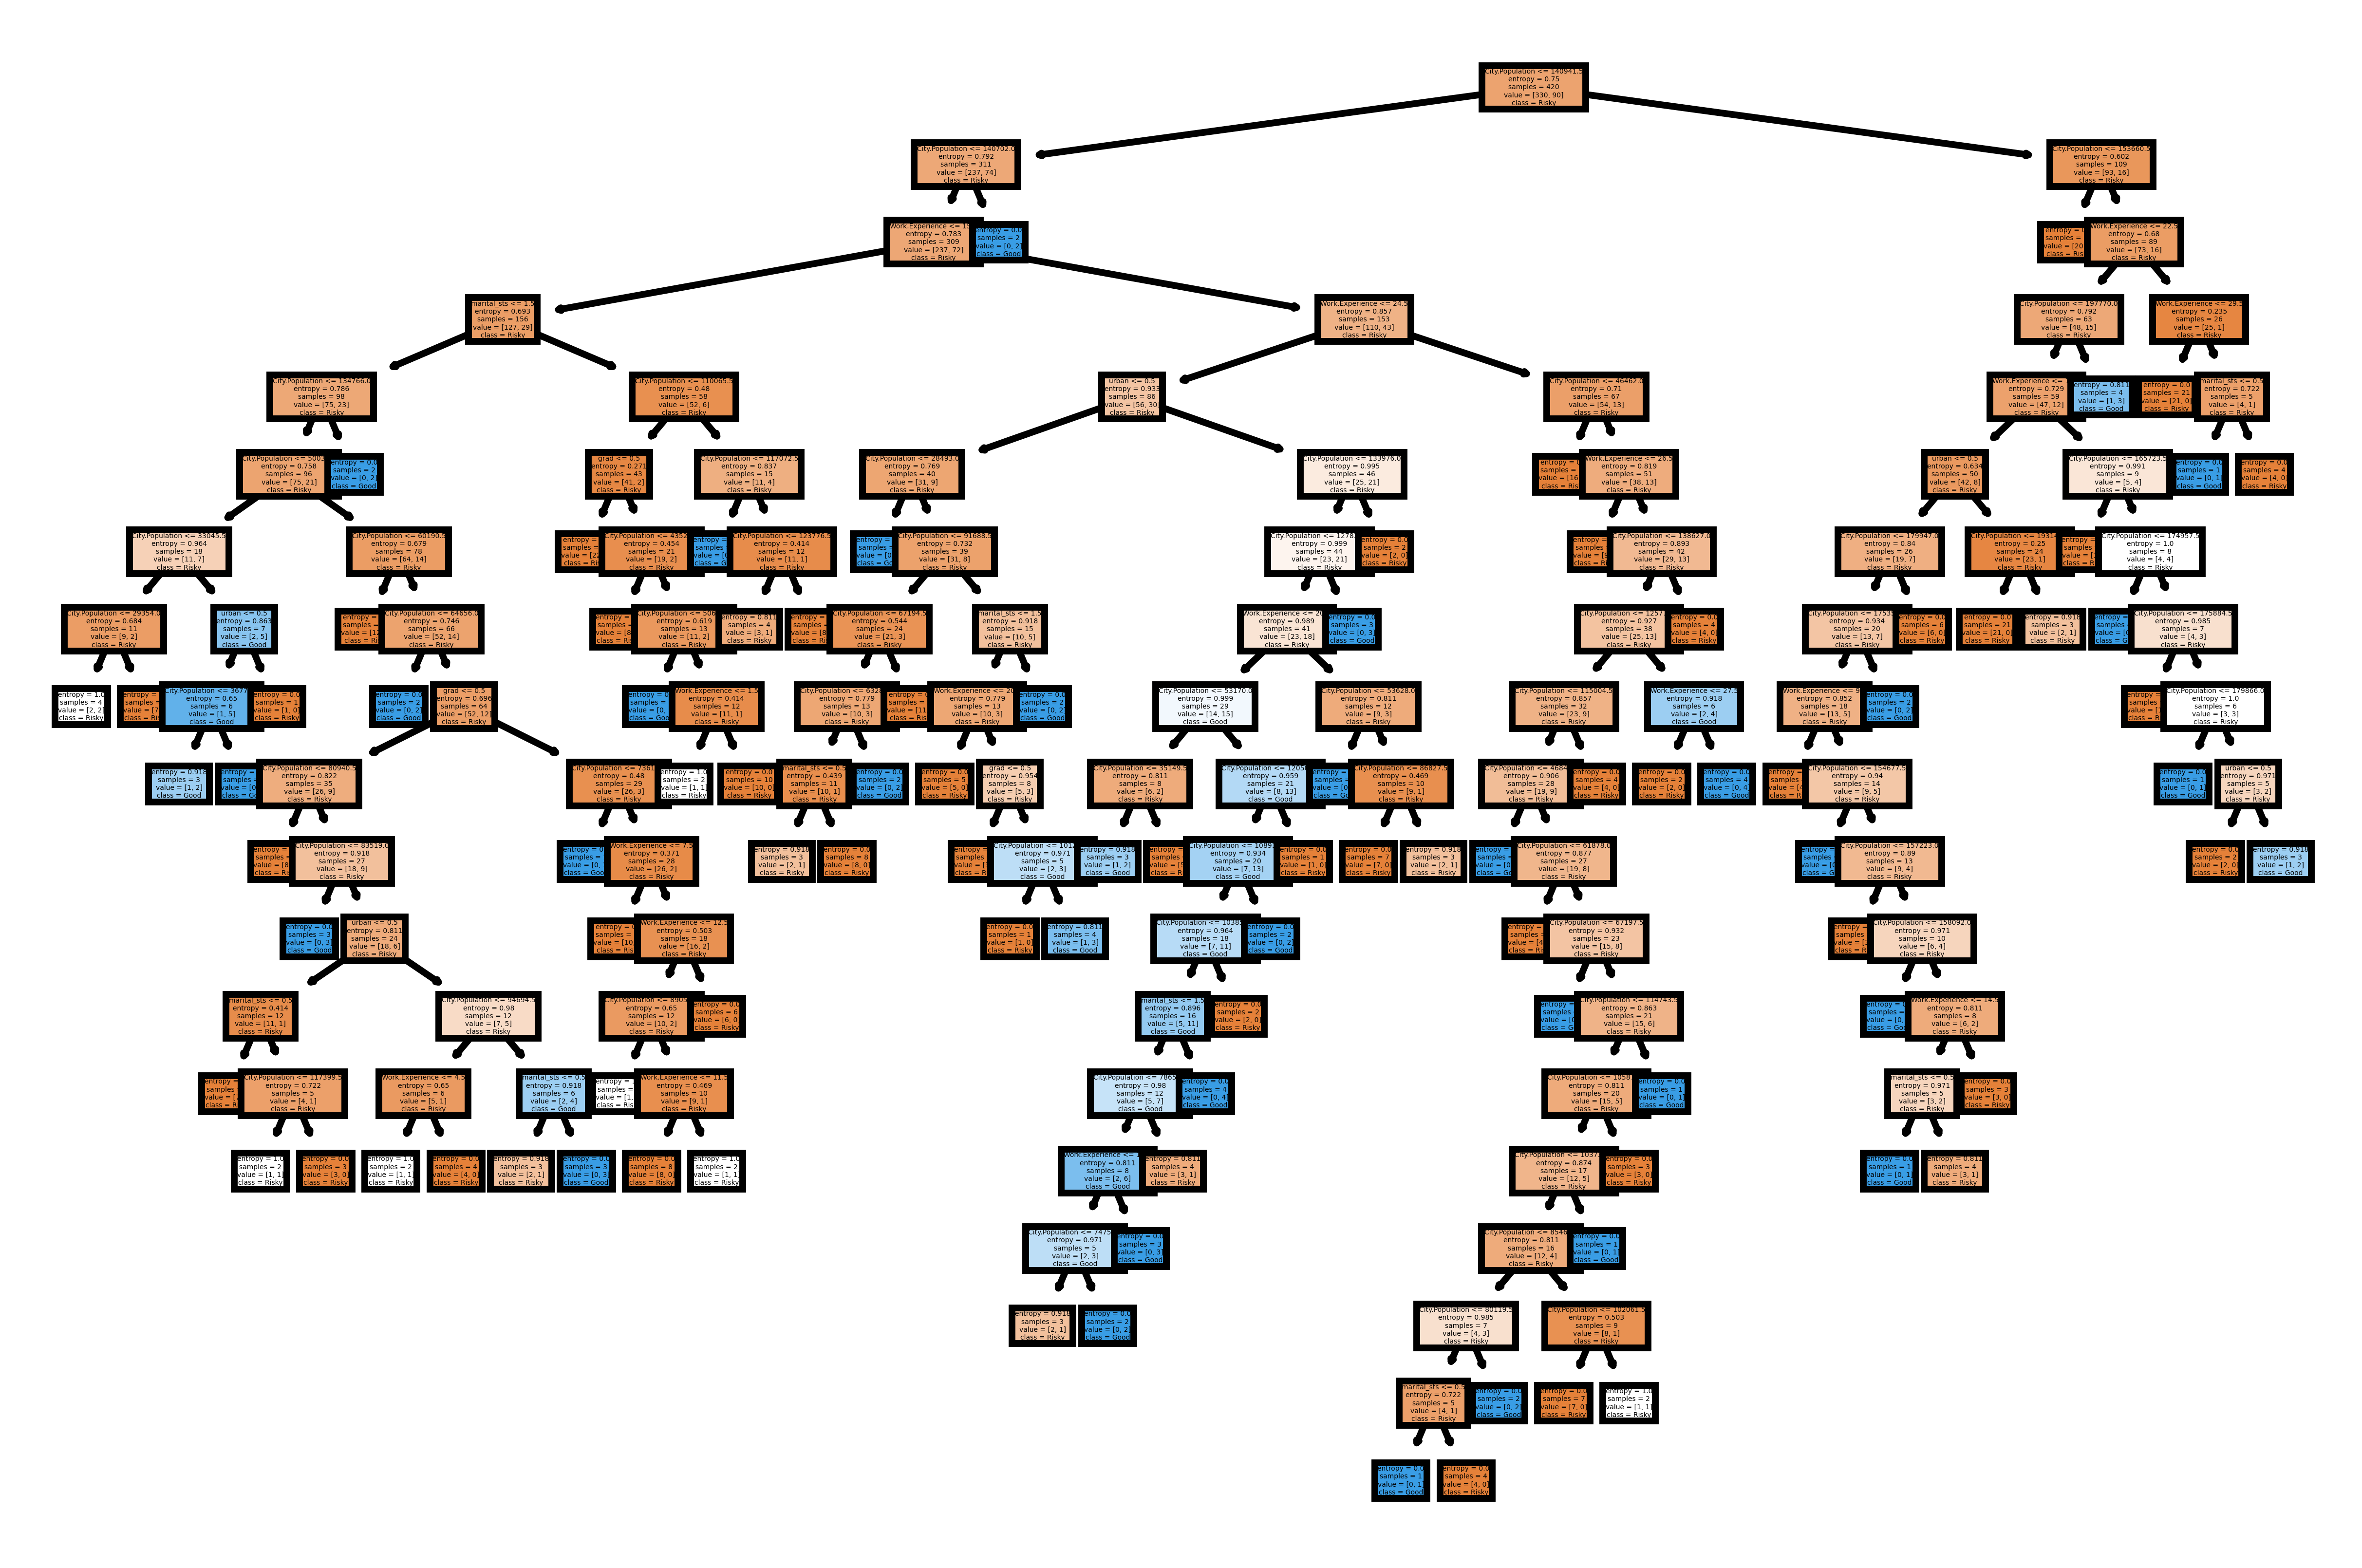

In [138]:
# Plot the tree
fn=['City.Population','Work.Experience','grad','marital_sts','urban']
cn=['Risky','Good']
plt.figure(dpi=1000);
tree.plot_tree(DT,feature_names=fn,class_names=cn,filled=True);

In [245]:
# Feature Importance
DT.feature_importances_

array([0.65066859, 0.17351412, 0.02602317, 0.09383624, 0.05595787])

In [249]:
fi=pd.DataFrame({'Features':list(x_train.columns),'Importance':DT.feature_importances_})
fi.sort_values('Importance',ascending=False)

,Features,Importance
0,City.Population,0.650669
1,Work.Experience,0.173514
3,marital_sts,0.093836
4,urban,0.055958
2,grad,0.026023


The City Population feature has the highest importance.

# Q2. Company data

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

The attributes are as follows:

1. Sales -- Unit sales (in thousands) at each location

2. Competitor Price -- Price charged by competitor at each location

3. Income -- Community income level (in thousands of dollars)

4. Advertising -- Local advertising budget for company at each location (in thousands of dollars)

5. Population -- Population size in region (in thousands)

6. Price -- Price company charges for car seats at each site

7. Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site.

8. Age -- Average age of the local population

9. Education -- Education level at each location

10. Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

11. US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [213]:
data_2=pd.read_csv("Company_Data.csv")

In [214]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [215]:
data_2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [216]:
data_2.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [217]:
data_2.shape

(400, 11)

In [218]:
# Correlation table
correlation=data_2.corr()
correlation

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

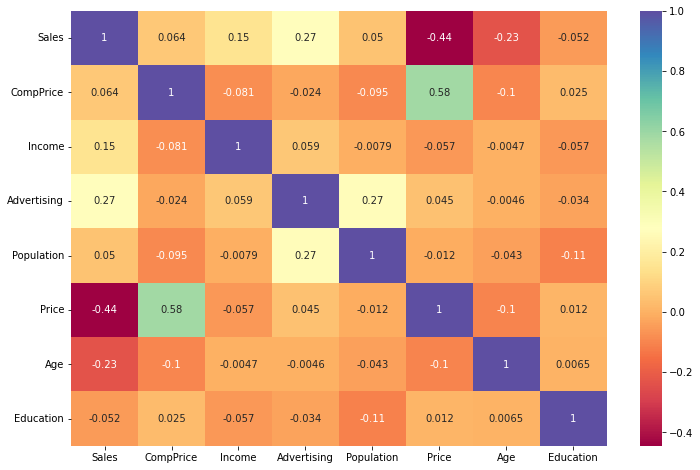

In [219]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='Spectral')

As we can see from the heatmap, the features have very less relationship between them.

<AxesSubplot:xlabel='Sales'>

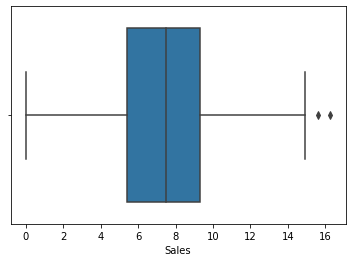

In [220]:
# Checking for outliers
sns.boxplot(data_2['Sales'])

There are 2 outliers present 

In [221]:
data_2=pd.get_dummies(data_2)

In [222]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    uint8  
 9   ShelveLoc_Good    400 non-null    uint8  
 10  ShelveLoc_Medium  400 non-null    uint8  
 11  Urban_No          400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_No             400 non-null    uint8  
 14  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 27.9 KB


# Converting the target variable from continuos to categorical data based on the "Median" 

# If Sales <= 7.49 --> 'Low' Sales value, If Sales > 7.49--> 'High' Sales value
   

In [223]:
data_2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [224]:
data_2['Sales']=np.where(data_2['Sales']<=7.49,'Low','High')

In [225]:
data_2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,High,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,High,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,High,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Low,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Low,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Low,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Low,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Low,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [226]:
# Splitting features and target variable

X=data_2.iloc[:,1:]
Y=data_2.iloc[:,0:1]

In [227]:
# Splitting the data into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1234)

In [228]:
X_train.shape

(280, 14)

In [229]:
X_test.shape

(120, 14)

In [230]:
# Model creation
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,random_state=8)
model.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=5, random_state=8)

In [231]:
# Testing model on training data
Y_train_pred=model.predict(X_train)
accuracy_score(Y_train,Y_train_pred)

0.9678571428571429

In [233]:
confusion_matrix(Y_train,Y_train_pred)

array([[142,   3],
       [  6, 129]], dtype=int64)

In [234]:
# Testing the model on test data
Y_test_pred=model.predict(X_test)
accuracy_score(Y_test,Y_test_pred)

0.7583333333333333

In [235]:
confusion_matrix(Y_test,Y_test_pred)

array([[40, 14],
       [15, 51]], dtype=int64)

# The Accuracy on test data is 75.83%

# Tree Plot

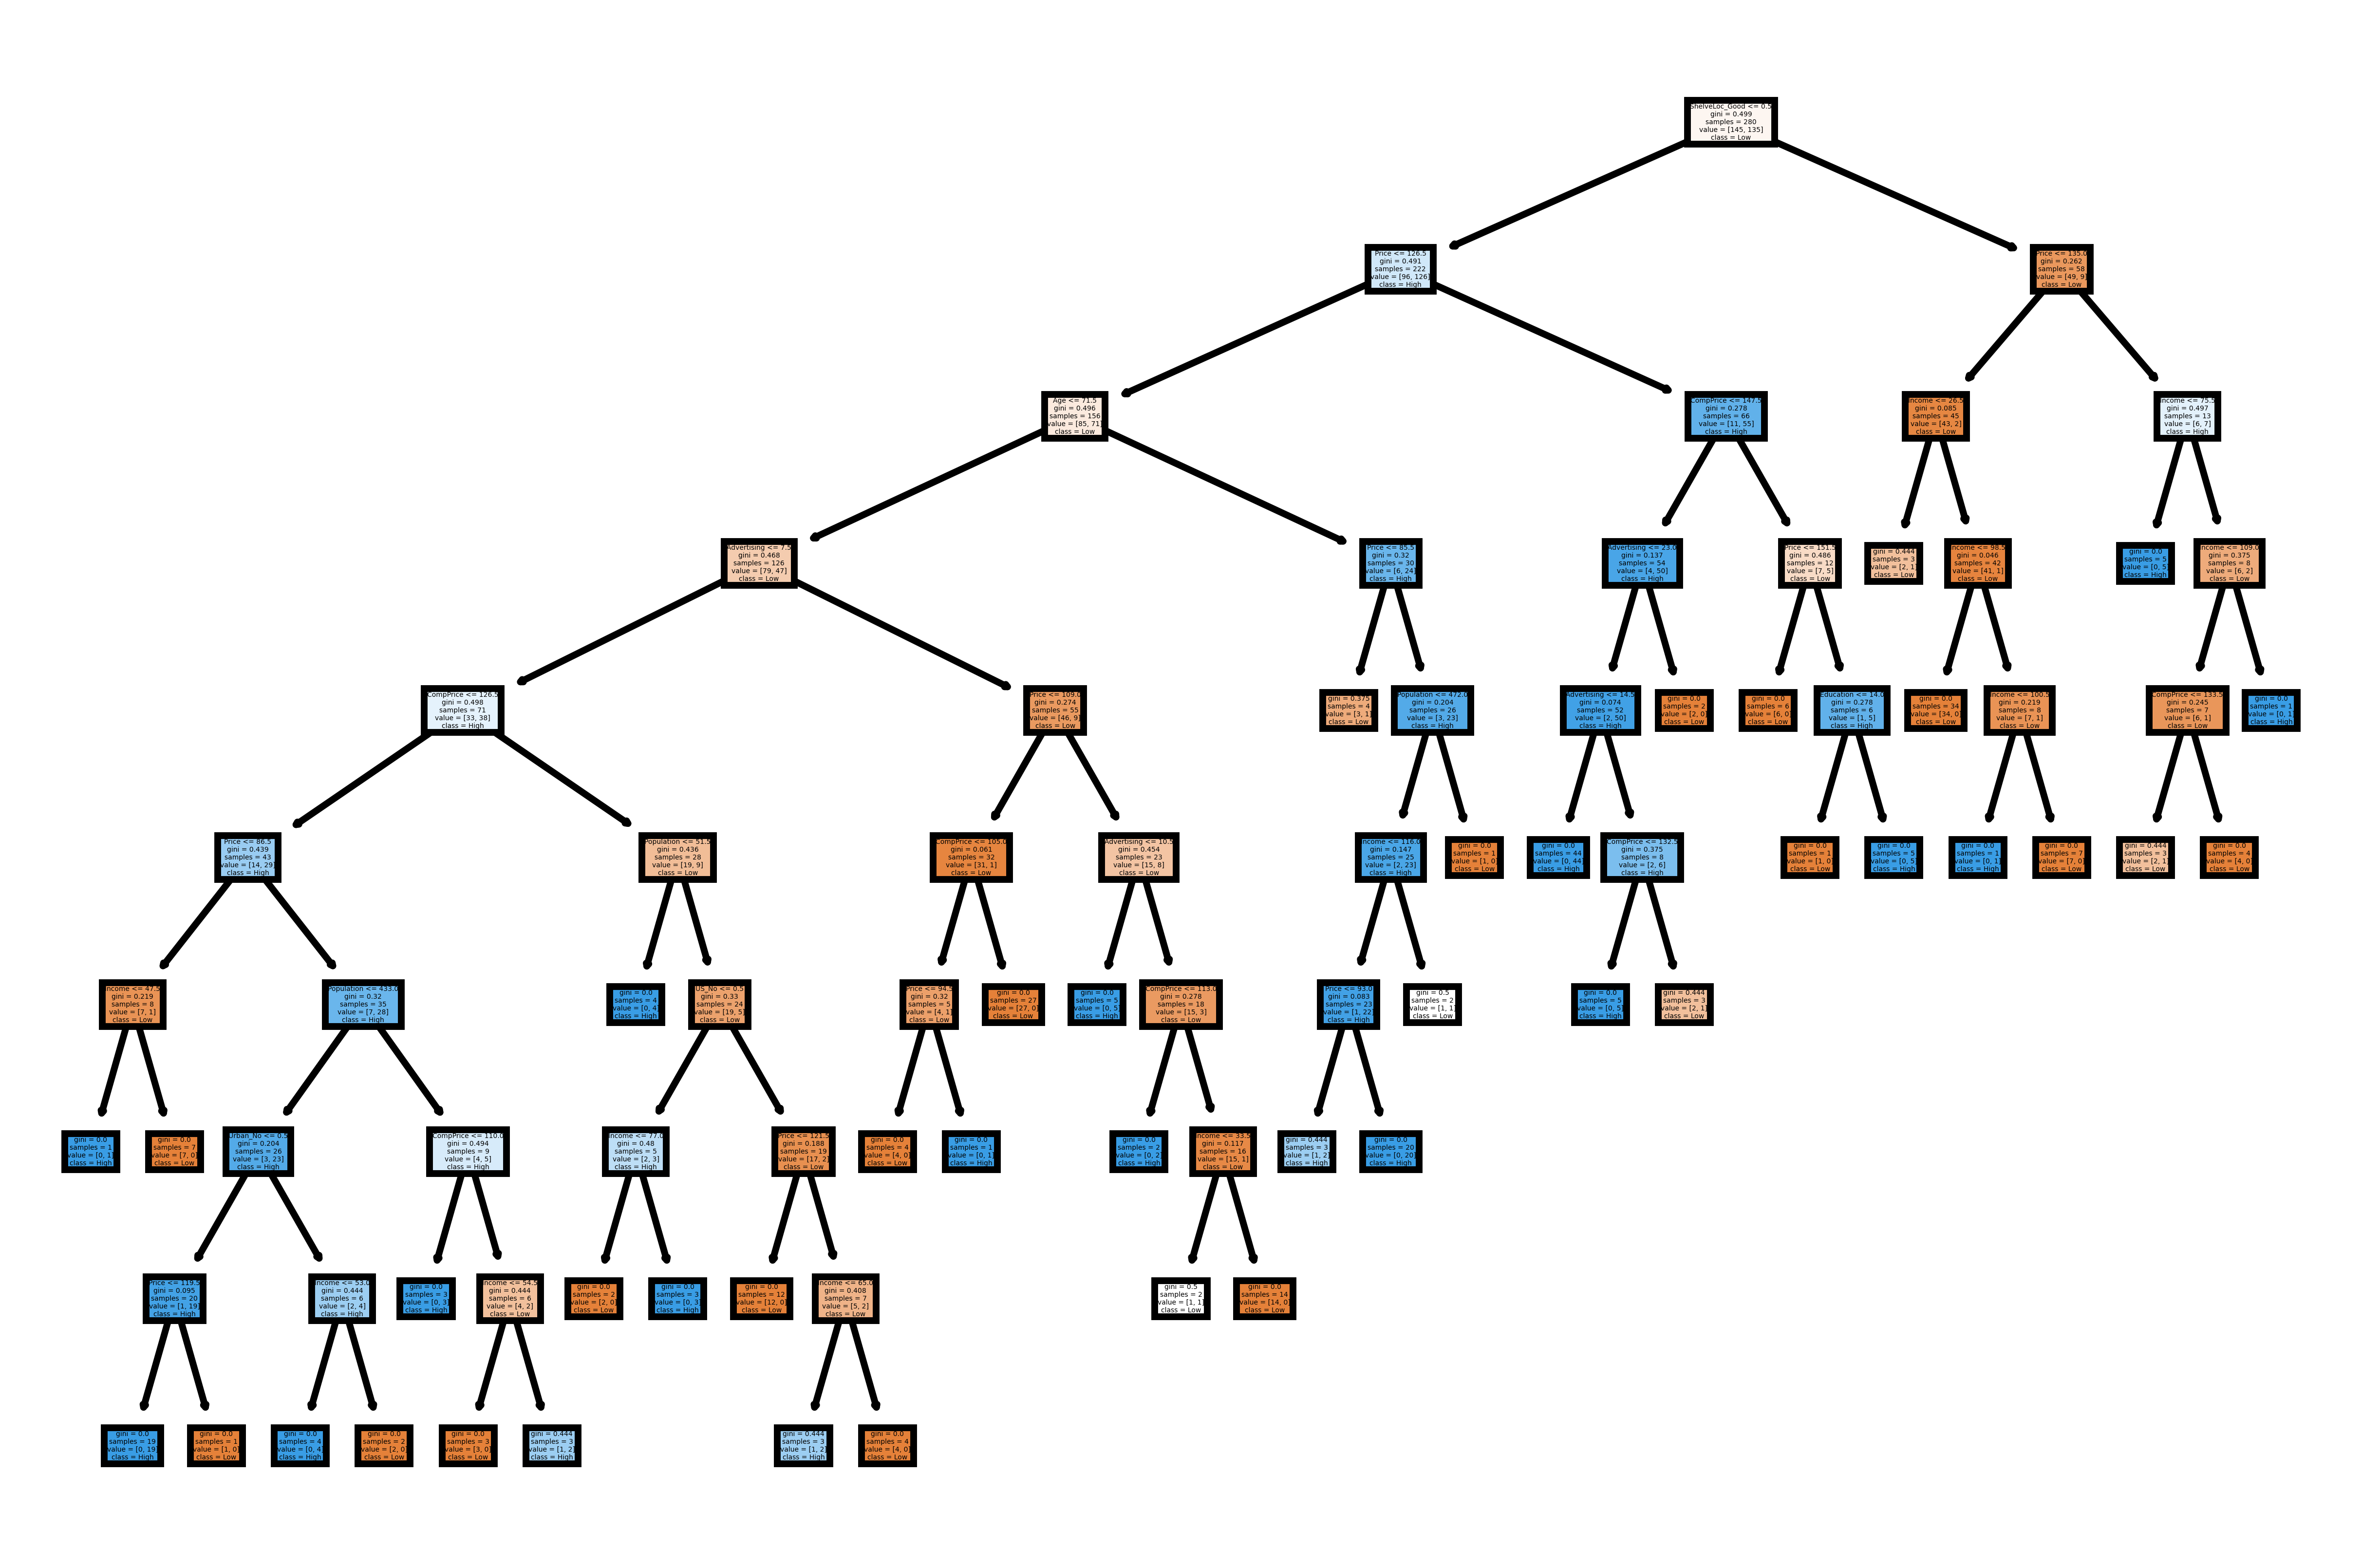

In [240]:
f_n=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
c_n=['Low','High']
plt.figure(dpi=1000);
tree.plot_tree(model,feature_names=f_n,class_names=c_n,filled=True);

In [250]:
# Feature Importance
model.feature_importances_

array([0.12941273, 0.14457373, 0.14339155, 0.05745864, 0.30055349,
       0.06885278, 0.01298822, 0.        , 0.12189359, 0.        ,
       0.00577476, 0.        , 0.01510051, 0.        ])

In [251]:
FI=pd.DataFrame({'Features':list(X_train.columns),'Importance':model.feature_importances_})
FI.sort_values('Importance',ascending=False)

,Features,Importance
4,Price,0.300553
1,Income,0.144574
2,Advertising,0.143392
0,CompPrice,0.129413
8,ShelveLoc_Good,0.121894
5,Age,0.068853
3,Population,0.057459
12,US_No,0.015101
6,Education,0.012988
10,Urban_No,0.005775


As we can see the "Price" feature has highest importance.